In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/My Drive/UFPR/TCC/UHCS/Rev. 01

/content/drive/My Drive/UFPR/TCC/UHCS/Rev. 01


In [ ]:
labels = pd.read_csv('labels_01.csv', index_col=0) # Loading the data generated through the web scrapping

In [ ]:
labels.head()

,id,Microconstituent
0,Micrograph 1,pearlite
1,Micrograph 2,spheroidite
2,Micrograph 3,quality
3,Micrograph 4,pearlite+spheroidite
4,Micrograph 5,pearlite


In [ ]:
for i in labels.Microconstituent.unique():
  print('Qty of {}:'.format(i), labels.loc[labels['Microconstituent']==i].count()[0])

Qty of pearlite: 123
Qty of spheroidite: 374
Qty of quality: 161
Qty of pearlite+spheroidite: 107
Qty of spheroidite+widmanstatten: 81
Qty of network: 212
Qty of None: 279
Qty of crack: 94
Qty of martensite: 36
Qty of figure: 8
Qty of hole: 73
Qty of indent: 72
Qty of sample: 84
Qty of pearlite+widmanstatten: 27


In [ ]:
dropped = ['quality', 'network', 'None', 'crack', 'figure', 'hole', 'indent', 'sample']

for i in dropped:
  labels = labels[labels['Microconstituent'] != i]

In [ ]:
for i in labels.Microconstituent.unique():
  qty = labels.loc[labels['Microconstituent']==i].count()[0]
  total = labels['Microconstituent'].count()
  print('Qty of {}:'.format(i), qty, qty/total)

Qty of pearlite: 123 0.16443850267379678
Qty of spheroidite: 374 0.5
Qty of pearlite+spheroidite: 107 0.14304812834224598
Qty of spheroidite+widmanstatten: 81 0.10828877005347594
Qty of martensite: 36 0.0481283422459893
Qty of pearlite+widmanstatten: 27 0.03609625668449198


In [ ]:
import os

In [ ]:
os.mkdir('img')
for i in labels['Microconstituent'].unique():
  os.mkdir('img/'+i)

In [ ]:
import shutil

In [ ]:
labels['id'] = labels['id'].apply(lambda x: 'micrograph'+x.split()[1]+'.png')

In [ ]:
labels['id'][labels['Microconstituent']=='pearlite']

0          micrograph1.png
4          micrograph5.png
51        micrograph52.png
58        micrograph59.png
73        micrograph74.png
               ...        
1670    micrograph1671.png
1695    micrograph1696.png
1697    micrograph1698.png
1720    micrograph1721.png
1730    micrograph1731.png
Name: id, Length: 123, dtype: object

In [ ]:
labels['id']

0          micrograph1.png
1          micrograph2.png
3          micrograph4.png
4          micrograph5.png
5          micrograph6.png
               ...        
1721    micrograph1722.png
1722    micrograph1723.png
1725    micrograph1726.png
1729    micrograph1730.png
1730    micrograph1731.png
Name: id, Length: 748, dtype: object

In [ ]:
%ls

ImagePreprocessing_01.ipynb  MobileNetV2_01.ipynb
img/                         Web_Scrapping_Images.ipynb
labels_01.csv                Web_Scrapping_labels.ipynb
micrographs/


In [ ]:
for i in labels['Microconstituent'].unique():
  for a in labels['id'][labels['Microconstituent']==i]:
    original = 'micrographs/'+a 
    target = 'img/'+i
    shutil.copy(original, target)

In [ ]:
labels.head(10)

,id,Microconstituent
0,micrograph1.png,pearlite
1,micrograph2.png,spheroidite
3,micrograph4.png,pearlite+spheroidite
4,micrograph5.png,pearlite
5,micrograph6.png,spheroidite
6,micrograph7.png,spheroidite+widmanstatten
9,micrograph10.png,spheroidite
10,micrograph11.png,spheroidite
11,micrograph12.png,pearlite+spheroidite
14,micrograph15.png,pearlite+spheroidite


In [ ]:
# All the images have labels attached to them, so we're gonna crop the label off so it doesn't affect our model

import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('micrographs/micrograph1.png', 0)

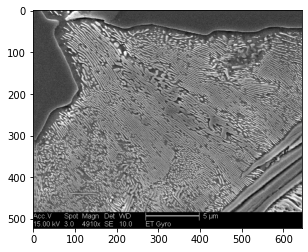

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
img.shape

(522, 645)

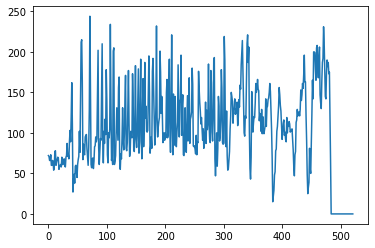

In [ ]:
plt.plot(img[:,600]) # Analysing one vertical line of pixels, the label is where the graph suddenly drops to zero

In [ ]:
np.where(img[:,600]==0)[0][0] # The pixel where the label starts

484

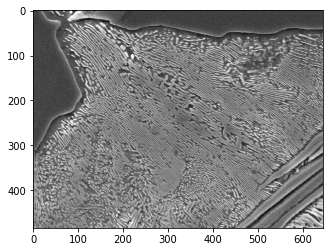

In [ ]:
plt.imshow(img[:484,:], cmap='gray') # The image without the label

In [ ]:
def img_crop(folder_path):
    """Crop off the labels of all the imagens in a folder"""
    
    file_names = os.listdir(folder_path)
    
    for i in file_names:
        img = cv2.imread(folder_path+i, 0)
        new_img = img[:484,:]
        cv2.imwrite(folder_path+i, new_img)

In [ ]:
for i in labels['Microconstituent'].unique():
  path = 'img/'+i+'/'
  img_crop(path)

In [ ]:
for i in labels['Microconstituent'].unique():
  print('number of {} images: '.format(i), len(os.listdir('img/'+i+'/')))

number of pearlite images:  123
number of spheroidite images:  374
number of pearlite+spheroidite images:  107
number of spheroidite+widmanstatten images:  81
number of martensite images:  36
number of pearlite+widmanstatten images:  27
